In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

In [7]:
train = pd.read_csv('data/train.csv')
train.head()

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


In [8]:
train.info()
# No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34250 entries, 0 to 34249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   posting_id   34250 non-null  object
 1   image        34250 non-null  object
 2   image_phash  34250 non-null  object
 3   title        34250 non-null  object
 4   label_group  34250 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


In [9]:
print("Number of Unique Classes:",train['label_group'].nunique())
print("Number of Unique Hashes:",train['image_phash'].nunique())
print("Number of Unique images:",train['image'].nunique())
print("Number of Unique titles:",train['title'].nunique())
print("Number of Rows:",train.shape[0])

Number of Unique Classes: 11014
Number of Unique Hashes: 28735
Number of Unique images: 32412
Number of Unique titles: 33117
Number of Rows: 34250


In [10]:
test = pd.read_csv("data/test.csv")
test.head()

,posting_id,image,image_phash,title
0,test_2255846744,0006c8e5462ae52167402bac1c2e916e.jpg,ecc292392dc7687a,Edufuntoys - CHARACTER PHONE ada lampu dan mus...
1,test_3588702337,0007585c4d0f932859339129f709bfdc.jpg,e9968f60d2699e2c,(Beli 1 Free Spatula) Masker Komedo | Blackhea...
2,test_4015706929,0008377d3662e83ef44e1881af38b879.jpg,ba81c17e3581cabe,READY Lemonilo Mie instant sehat kuah dan goreng


In [17]:
train_images_directory = 'data/train_images'
test_images_directory = 'data/test_images'

def get_all_images_path(path):
    
    images_path = []
    for dirname,_,filenames in os.walk(path):
        for filename in filenames:
            req_path = os.path.join(dirname,filename)
            images_path.append(req_path)
            
#             print(req_path)
    return images_path

train_images = get_all_images_path(train_images_directory)

In [18]:
def plot_some(path,rows,cols):
    
    figure, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(20,15) )
    for ind,image_path in enumerate(path):
        if ind >= rows*cols:
            break
        image=plt.imread(image_path)
#         print(ind)
        ax.ravel()[ind].imshow(image)
    plt.tight_layout()
    plt.show()

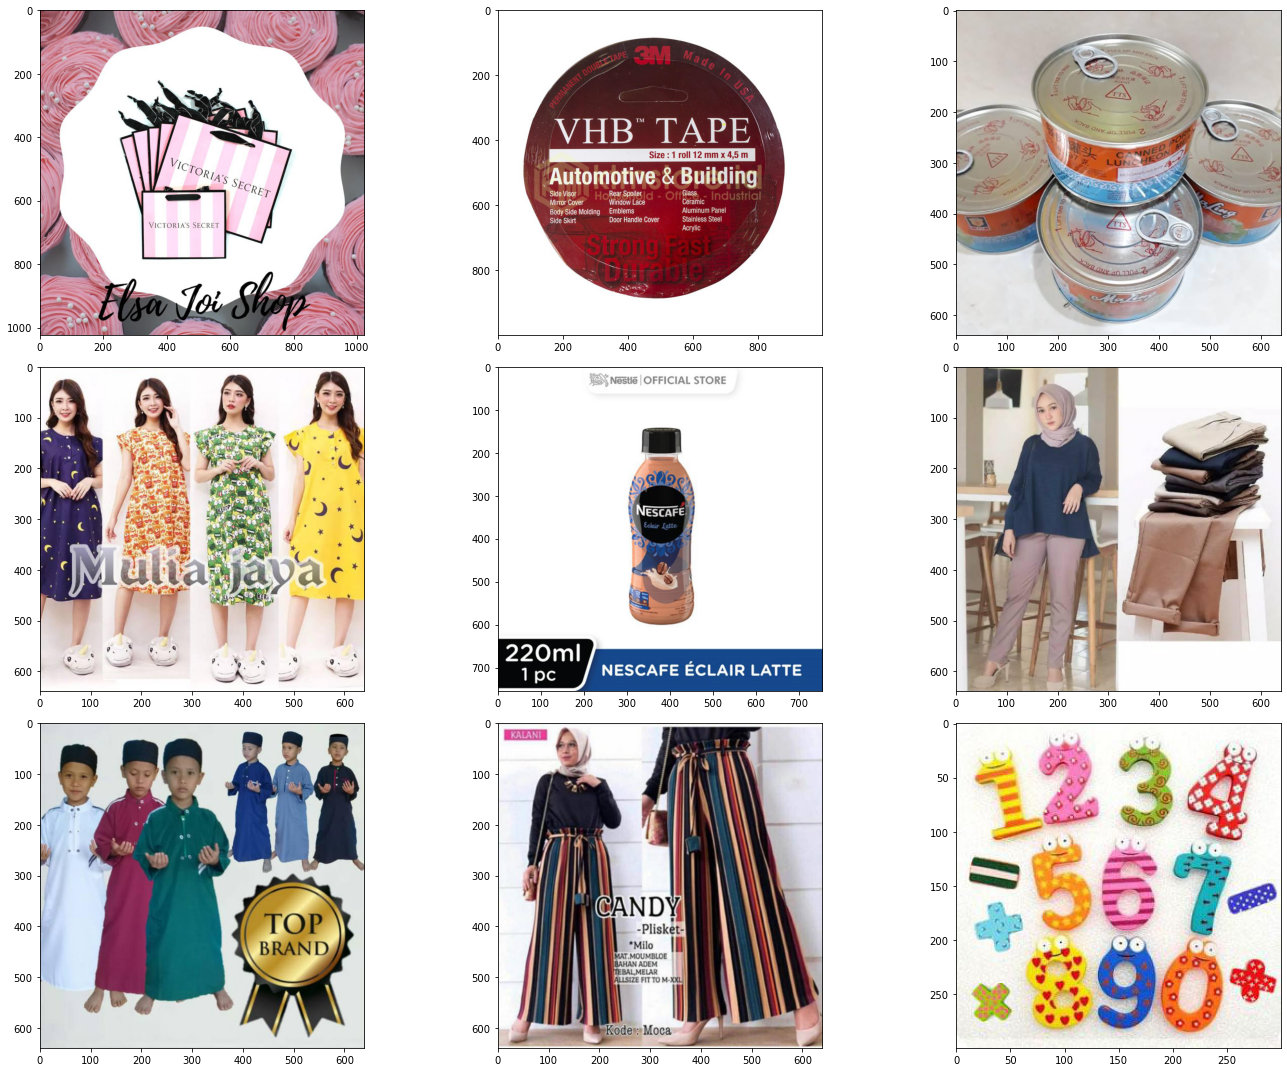

In [20]:
plot_some(train_images,3,3)
# train_images

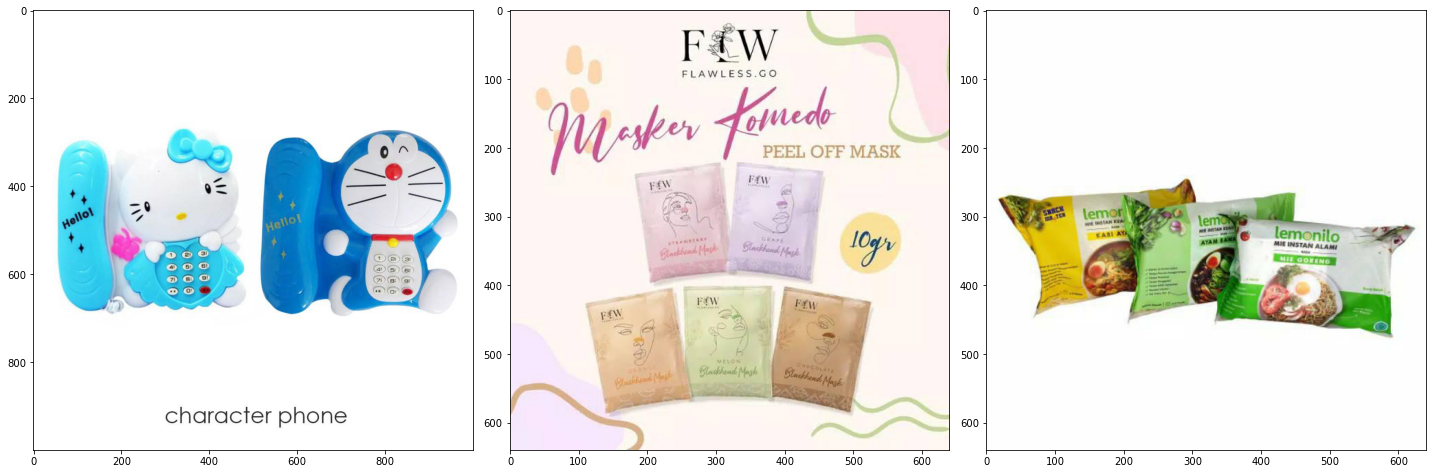

In [21]:
# for test_images

test_images_path = get_all_images_path(test_images_directory)
plot_some(test_images_path,1,3)